In [70]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [71]:
import numpy as np
import pandas as pd

In [72]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [73]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, distinct

In [74]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [75]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [76]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [77]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [78]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

('2017-08-23',)
2016-08-23


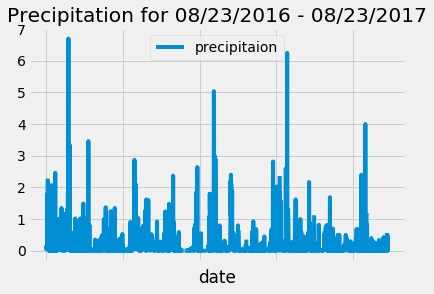

In [85]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from today
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)
first_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(first_date)
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
measurement_df = pd.DataFrame(session.query(Measurement.date, Measurement.prcp).\
                             filter(Measurement.date >= '2016-08-23').order_by(Measurement.date).all())
measurement_df.set_index('date', inplace = True)
measurement_df = measurement_df.rename(columns={"prcp":"precipitaion"})
# Use Pandas Plotting with Matplotlib to plot the data
plot = measurement_df.plot(title = "Precipitation for 08/23/2016 - 08/23/2017", rot=0)
# Rotate the xticks for the dates


In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measurement_df.describe()

,precipitaion
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [12]:
# How many stations are available in this dataset?
station_count = session.query(func.count(distinct(Measurement.station))).all()
station_count


[(9)]

In [13]:
# What are the most active stations?
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
                                order_by(func.count(Measurement.station).desc()).all()
active_stations

# List the stations and the counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
active_station_temps = session.query(func.max(Measurement.tobs), \
                                     func.min(Measurement.tobs), func.avg(Measurement.tobs)).\
                                    filter(Measurement.station == 'USC00519281').all()
active_station_temps

[(85.0, 54.0, 71.66378066378067)]

<IPython.core.display.Javascript object>


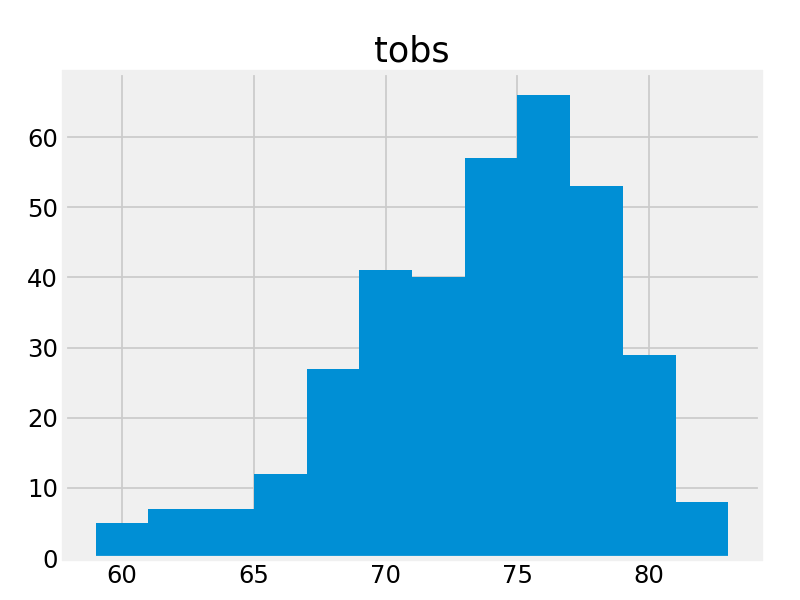

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015D5ADE7400>]],
      dtype=object)

In [47]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_stations = pd.DataFrame(session.query(Measurement.date, Measurement.tobs).\
                              filter(Measurement.date >= '2016-08-23').\
                              filter(Measurement.station == 'USC00519281').order_by(Measurement.date).all())
temp_stations.set_index('date', inplace = True)
temp_stations.hist(bins=12)


In [58]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2016-09-28', '2016-10-05'))

[(73.0, 78.31481481481481, 82.0)]


In [57]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps("2016-09-28", "2016-10-05"))

[(73.0, 78.31481481481481, 82.0)]


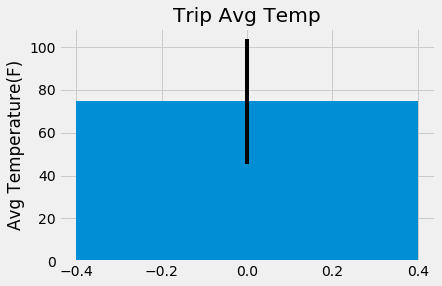

In [69]:
# Plot the results from your previous query as a bar chart.
calc_temps_list = calc_temps("2016-08-23", "2017-08-23")
yerr = (calc_temps_list[0][2] - calc_temps_list[0][0])
bar = plt.bar(0, calc_temps_list[0][1], align='center', yerr=yerr)
plt.title("Trip Avg Temp")
plt.ylabel("Avg Temperature(F)")
plt.show(bar)
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [56]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
rainfall = (session.query(Measurement.id, Measurement.prcp, Station.name, Station.latitude, Station.longitude, Station.elevation).\
            filter(Measurement.station == Station.station).filter(Measurement.date>='2016-09-28').filter(Measurement.date<='2016-10-05').\
             group_by(Measurement.id).order_by((Measurement.prcp).desc()).all())

rainfall

[(19243, 3.46, 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4),
 (19238, 1.49, 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4),
 (19240, 1.02, 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4),
 (19244, 0.81, 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4),
 (19241, 0.61, 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4),
 (14645, 0.59, 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (5128, 0.49, 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (19242, 0.46, 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4),
 (19239, 0.38, 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4),
 (5129, 0.31, 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (14646, 0.25, 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (7361,
  0.2,
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0),
 (11887,
  0.18,
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5),
 (14649, 0

## Optional Challenge Assignment

In [59]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [63]:
# calculate the daily normals for your trip
days = ['09-28', '09-29', '09-30', '10-01', '10-02', '10-03', '10-04', '10-05']
normals = []
for day in range(days):
    normals.append(daily_normals(days[day]))
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


TypeError: 'list' object cannot be interpreted as an integer

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


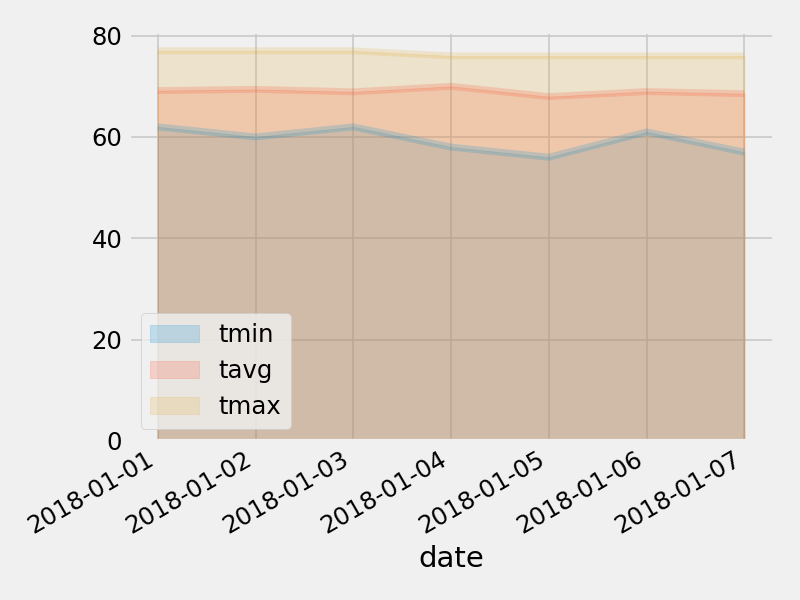

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
